In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv('E:\ds\mpg_raw (1).csv')

In [51]:
data.shape

(398, 9)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [53]:
q1=data['mpg'].quantile(0.25)
q3=data['mpg'].quantile(0.75)
IPR=q3-q1
UF=q3+(1.5*IPR)
LF=q1-(1.5*IPR)
print(UF)
print(LF)

46.25
0.25


In [54]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [55]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].mean())

In [56]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x226dd088050>,
 'caps': [<matplotlib.lines.Line2D at 0x226dd089350>,
 'boxes': [<matplotlib.lines.Line2D at 0x226dd077810>],
 'medians': [<matplotlib.lines.Line2D at 0x226dd08a650>],
 'fliers': [<matplotlib.lines.Line2D at 0x226dd089090>],
 'means': []}

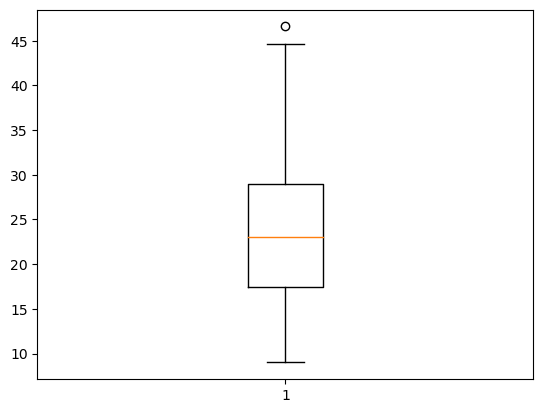

In [57]:
plt.boxplot(data['mpg'])

In [58]:
data=data[(data['mpg']>=LF) & (data['mpg']<=UF)]

{'whiskers': [<matplotlib.lines.Line2D at 0x226db86d450>,
 'caps': [<matplotlib.lines.Line2D at 0x226dce0f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x226dcf29b10>],
 'medians': [<matplotlib.lines.Line2D at 0x226dce7e310>],
 'fliers': [<matplotlib.lines.Line2D at 0x226db93dad0>],
 'means': []}

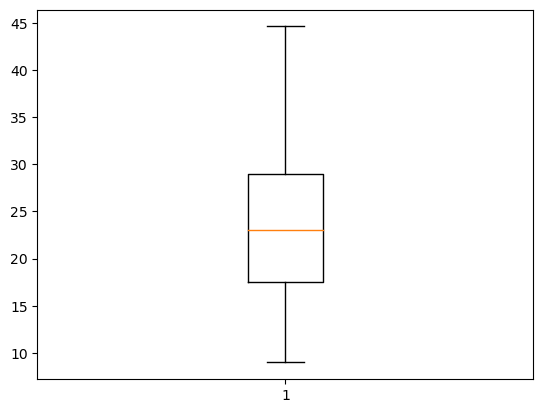

In [59]:
plt.boxplot(data['mpg'])

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col=data.select_dtypes(include=['int64','float64']).columns
col=scaler.fit_transform(data[col])
print(col)

[[-0.70592986  1.49553547  1.08809685 ...  0.62833707 -1.29290763
  -1.6250533 ]
 [-1.09405768  1.49553547  1.50104221 ...  0.85181073 -1.47438278
  -1.6250533 ]
 [-0.70592986  1.49553547  1.19373404 ...  0.54793385 -1.65585794
  -1.6250533 ]
 ...
 [ 1.10533326 -0.85819132 -0.56368456 ... -0.80118494 -1.43808775
   1.6250533 ]
 [ 0.58782951 -0.85819132 -0.70773526 ... -0.41099283  1.10256442
   1.6250533 ]
 [ 0.97595732 -0.85819132 -0.71733864 ... -0.29866479  1.39292467
   1.6250533 ]]


(array([ 27.,  94., 120.,  50.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

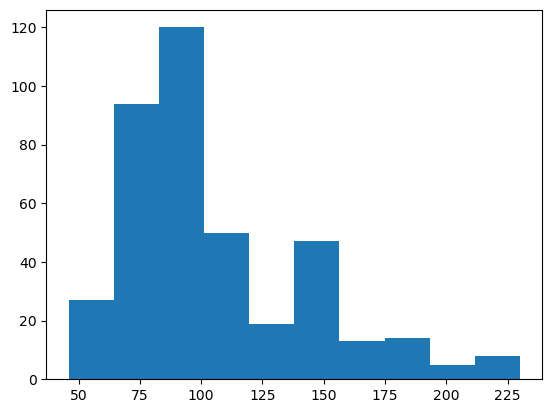

In [61]:
plt.hist(data['horsepower'])

<Axes: xlabel='horsepower', ylabel='Count'>

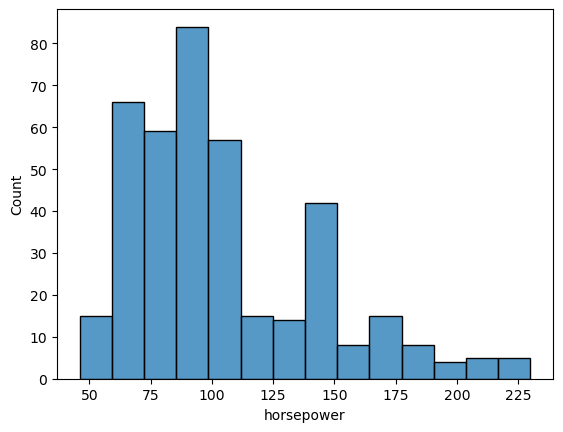

In [62]:
sns.histplot(data['horsepower'])

<Axes: xlabel='cylinders', ylabel='mpg'>

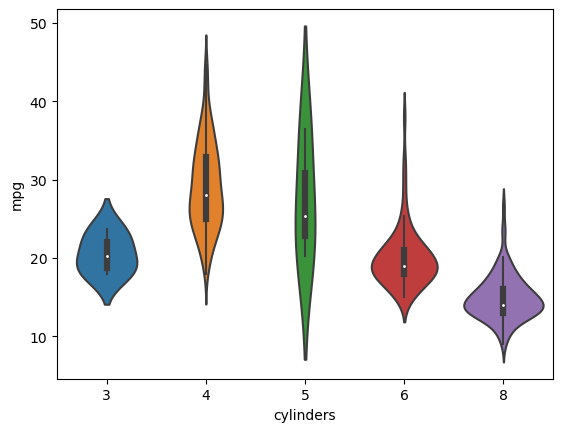

In [63]:
# #The thick black bar in the middle represents the interquartile range (IQR), which covers the middle 50% of the data.
# The white dot inside the black bar is the median.
# The shaded area on either side of the black bar resembles a mirrored density plot, showing the distribution of data within each category.
# The width of the violin corresponds to the data density; wider sections indicate higher density, while narrower sections indicate lower density

sns.violinplot(data=data,x='cylinders',y='mpg')

<Axes: >

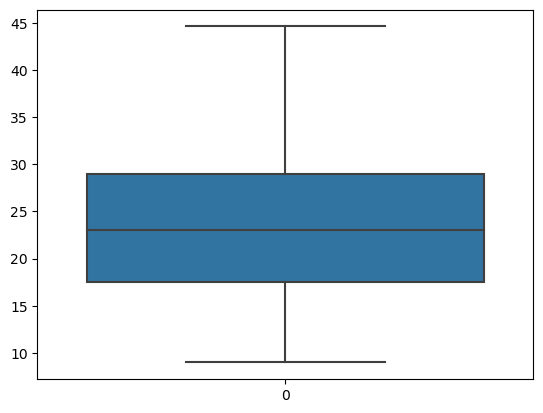

In [64]:
# data visualization technique used to display the summary statistics and distribution of a numerical variable
sns.boxplot(data['mpg'])

C:\Users\yoges\AppData\Local\Temp\ipykernel_20476\1810430502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'),annot=True)


<Axes: >

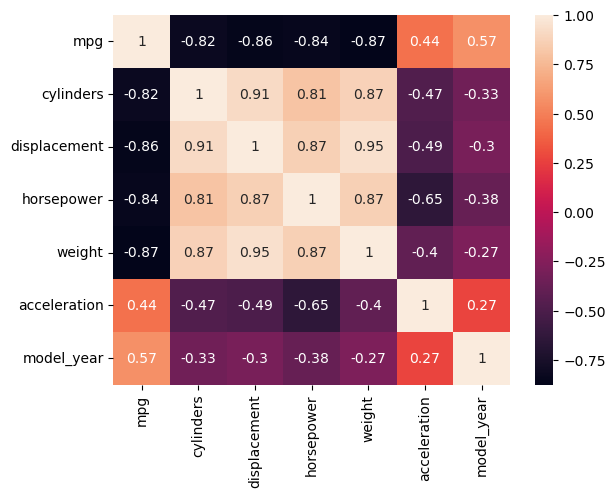

In [67]:
#graphical representation of data in a matrix-like format, where values are represented as colors. 
#It's often used to visualize the relationships or patterns in data, especially when you have a two-dimensional dataset.
sns.heatmap(data.corr(method='spearman'),annot=True)

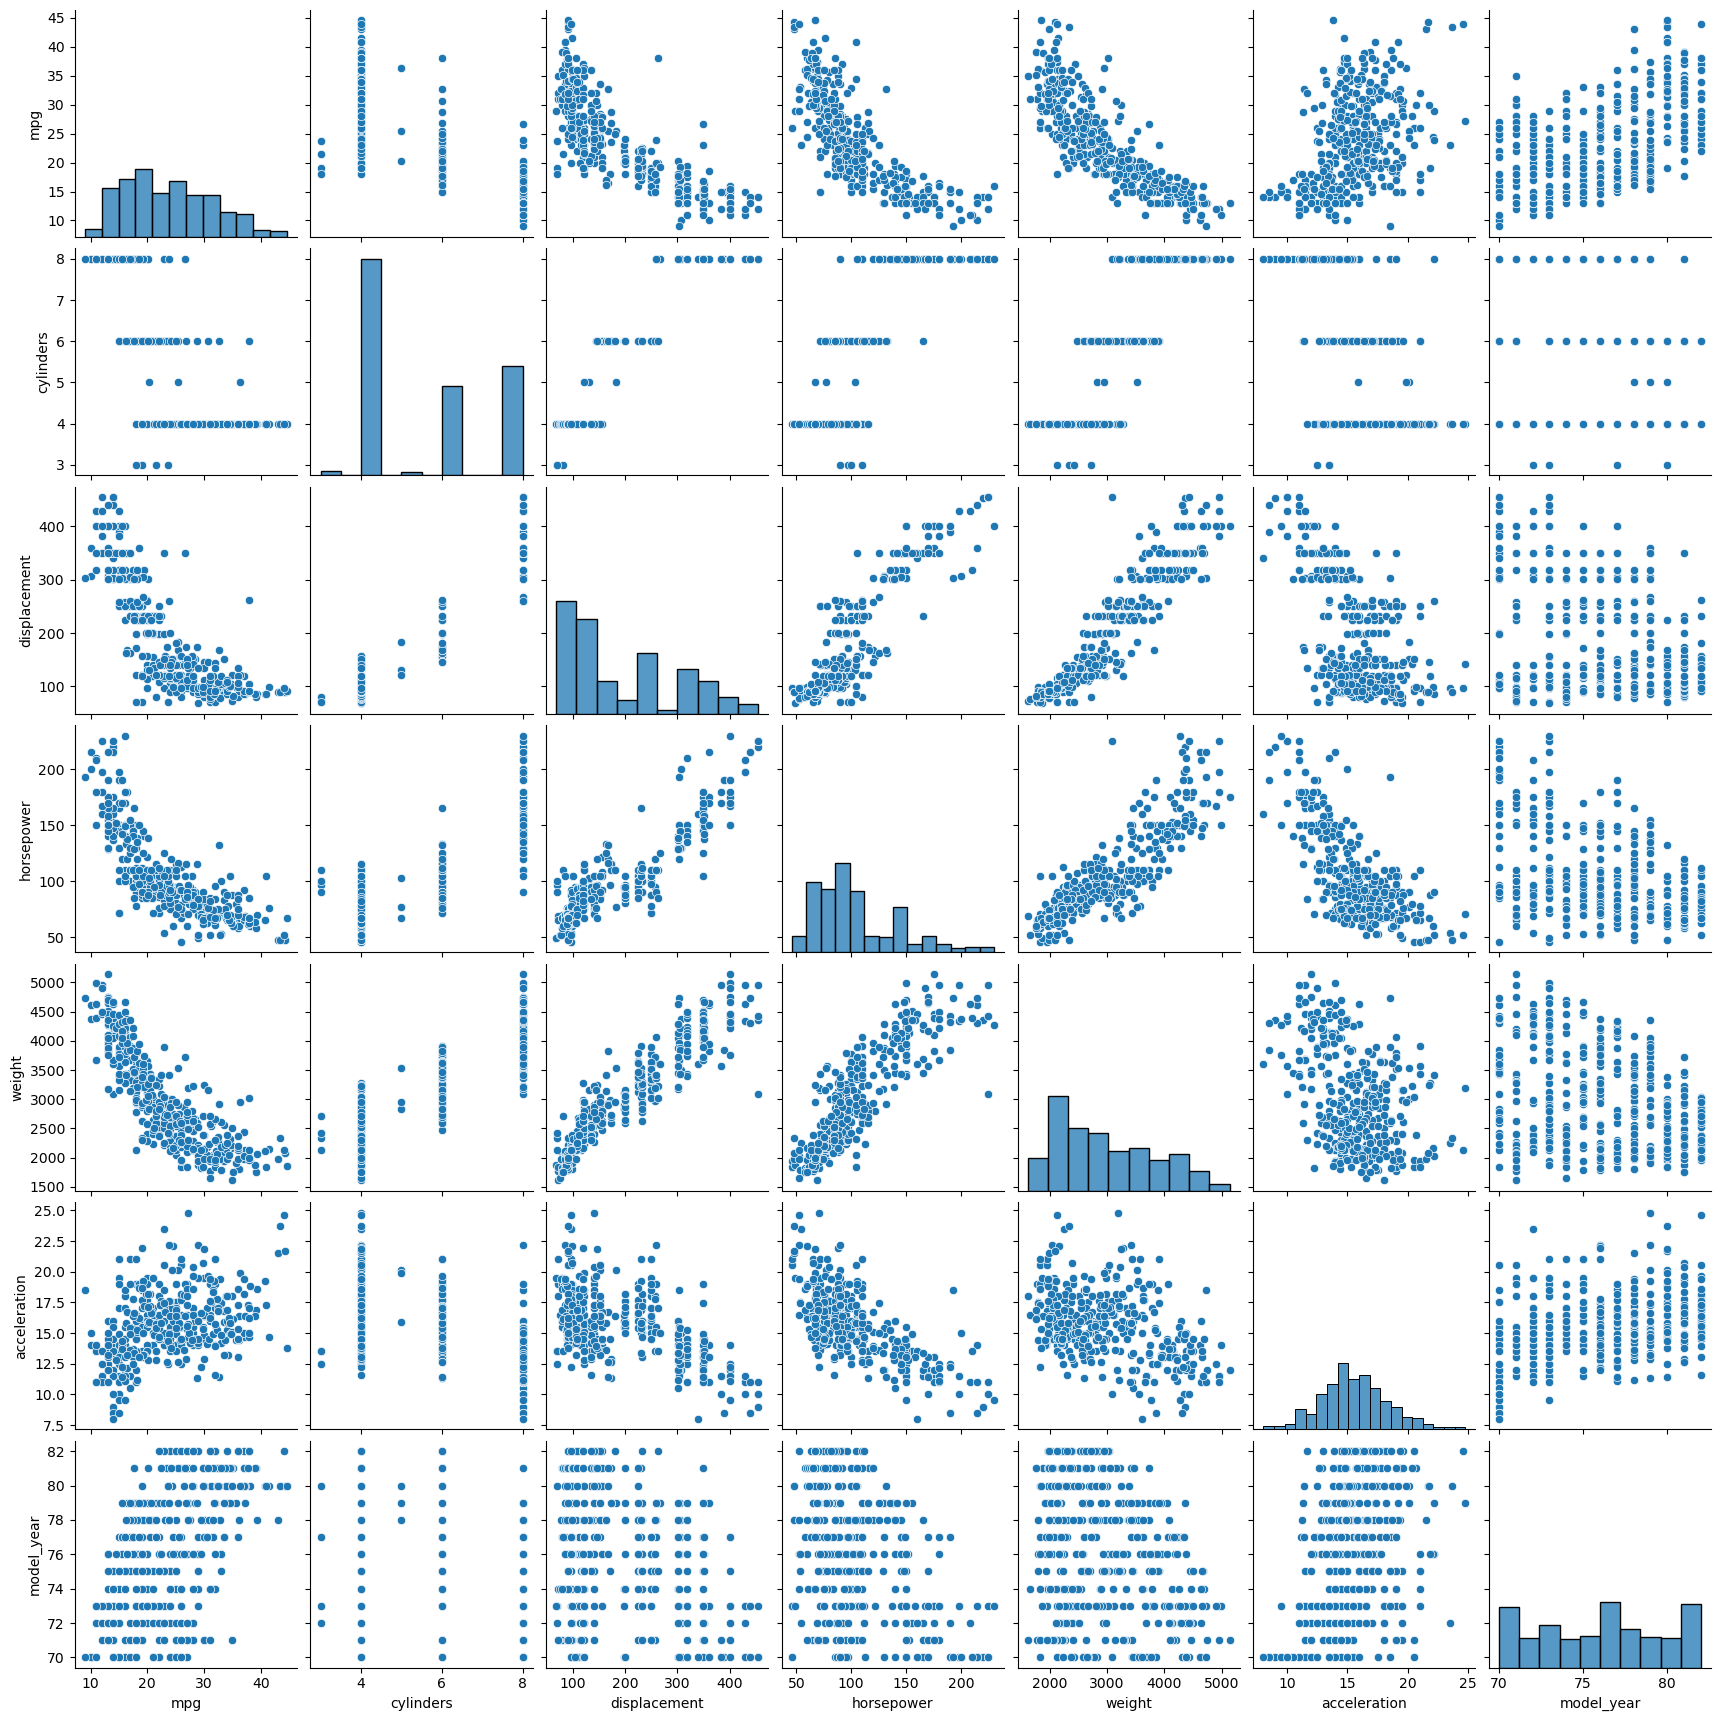

In [78]:
 #to display pairwise relationships between variables in a dataset.
sns.pairplot(data)

<Axes: xlabel='count', ylabel='cylinders'>

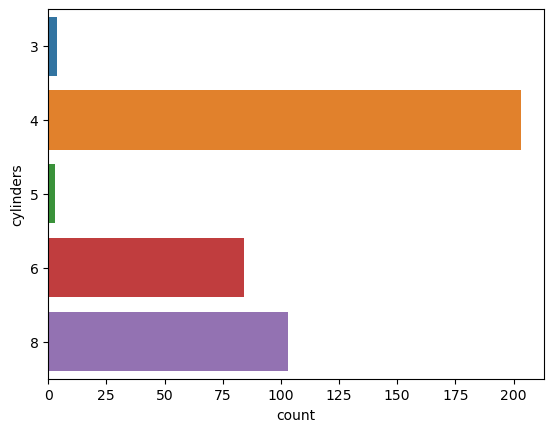

In [84]:
#countplot is a type of bar plot that displays the count or frequency of observations in each category of a categorical variable. 
sns.countplot(data=data,y='cylinders')

<Axes: xlabel='horsepower', ylabel='cylinders'>

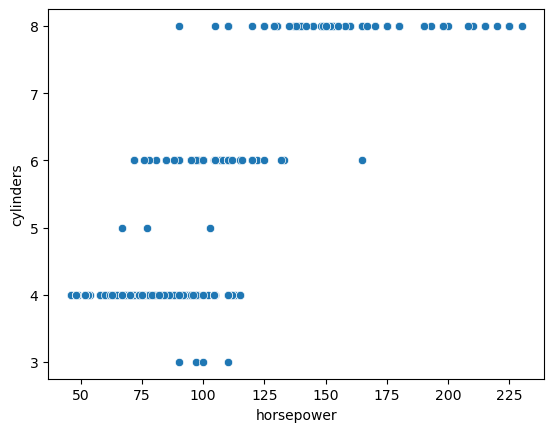

In [87]:
sns.scatterplot(data=data,x='horsepower',y='cylinders')
#scatterplot is a type of data visualization that displays individual data points as dots on a two-dimensional graph. 
#It is commonly used to visualize the relationship between two continuous variables, making it easier to identify patterns

<Axes: xlabel='horsepower', ylabel='cylinders'>

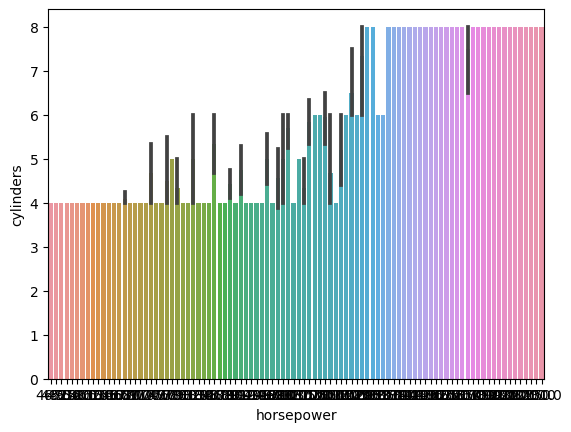

In [88]:
# A barplot is a type of data visualization used to display the distribution of a categorical variable. 
# It represents the values of the categorical variable as bars, with the height of each bar corresponding to the count,
sns.barplot(data=data,x='horsepower',y='cylinders')

<Axes: xlabel='horsepower', ylabel='cylinders'>

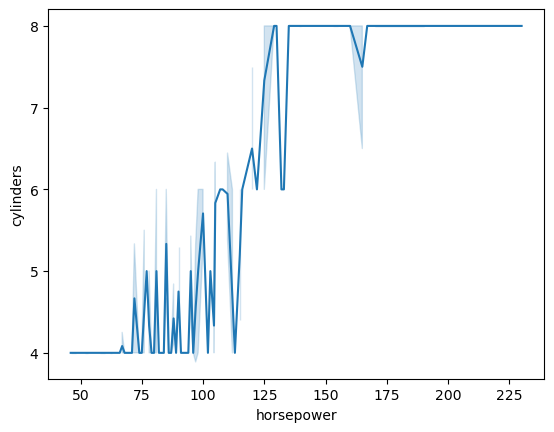

In [89]:
# A lineplot, also known as a line chart or line graph,
# is a data visualization technique used to display data points as connected line segments
sns.lineplot(data=data,x='horsepower',y='cylinders')